<a href="https://colab.research.google.com/github/lcipolina/escher/blob/master/ML/Upsampling_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best example here:
https://towardsdatascience.com/deep-learning-based-super-resolution-with-opencv-4fd736678066

### 1. Installing OpenCV with the contrib modules.

In [1]:
#Installs
!pip install wget --quiet
!pip install --upgrade opencv-python --quiet
!pip install --upgrade opencv-contrib-python --quiet

     |████████████████████████████████| 60.3 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 66.5 MB 129 kB/s 


In [2]:
#check version should be > 4.3
import cv2
cv2.__version__

'4.5.4'

In [3]:
#Imports
from google.colab.patches import cv2_imshow
from cv2 import dnn_superres

import base64, os
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
import wget
from shutil import copyfile
import shutil
import os
from google.colab import files

### 2. Downloading a pre-trained model.

We need to download the pre-trained models separately, because the OpenCV code-base does not contain them. The reason is some of the models are quite big. So if they were in the standard code-base, people who might not need them still would have to download them. 

****** MODELS *******

EDSR https://github.com/Saafke/EDSR_Tensorflow.git

ESPCN https://github.com/fannymonori/TF-ESPCN/tree/master/export

FSRCNN https://github.com/Saafke/FSRCNN_Tensorflow/tree/master/models

LapSRN https://github.com/fannymonori/TF-LapSRN/tree/master/export

In [4]:
!git clone https://github.com/Saafke/EDSR_Tensorflow.git

Cloning into 'EDSR_Tensorflow'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 149 (delta 1), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (149/149), 162.50 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (77/77), done.


### Upload Image

In [5]:
#Upload an image and rename it
#!wget "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png --quiet

upload_folder = 'content' #'upload'
result_folder = 'content'# 'results'
dst ='original.jpg' 

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
#os.mkdir(upload_folder)
#os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename) 
  os.rename(list(uploaded.keys())[0], dst)
  #print(f'move {filename} to {dst_path}')
  #shutil.move(filename, dst_path)

print('DONE!! refresh content folder!')  

Saving p1-2-input.jpg to p1-2-input.jpg
refresh content folder


Extract the model name and model scale from the file path
modelName,: needs to be "edsr", "espcn", "fsrcnn", or "lapsrn" 

Make to sure to pass the model name correctly in the lower case along with the correct upsampling ratio as the model taken in sr.setModel().

In [6]:
# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

# Read image
image = cv2.imread('/content/original.jpg')

# Read the desired model
path = "/content/EDSR_Tensorflow/models/EDSR_x4.pb" #upsample x4
sr.readModel(path)

# Set the model by passing the value and the upsampling ratio
sr.setModel("edsr", 4)

# Upscale the image
result = sr.upsample(image)

# Save the image
cv2.imwrite("./upscaled.png", result)

True

Show both side by side

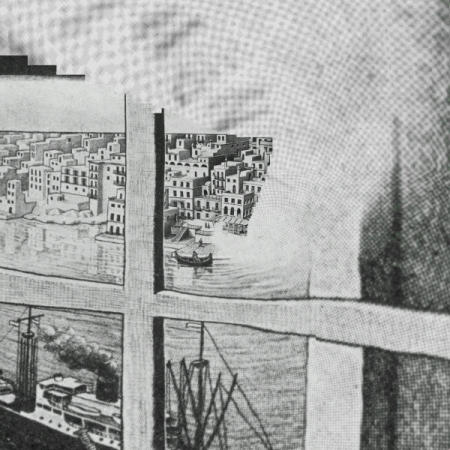

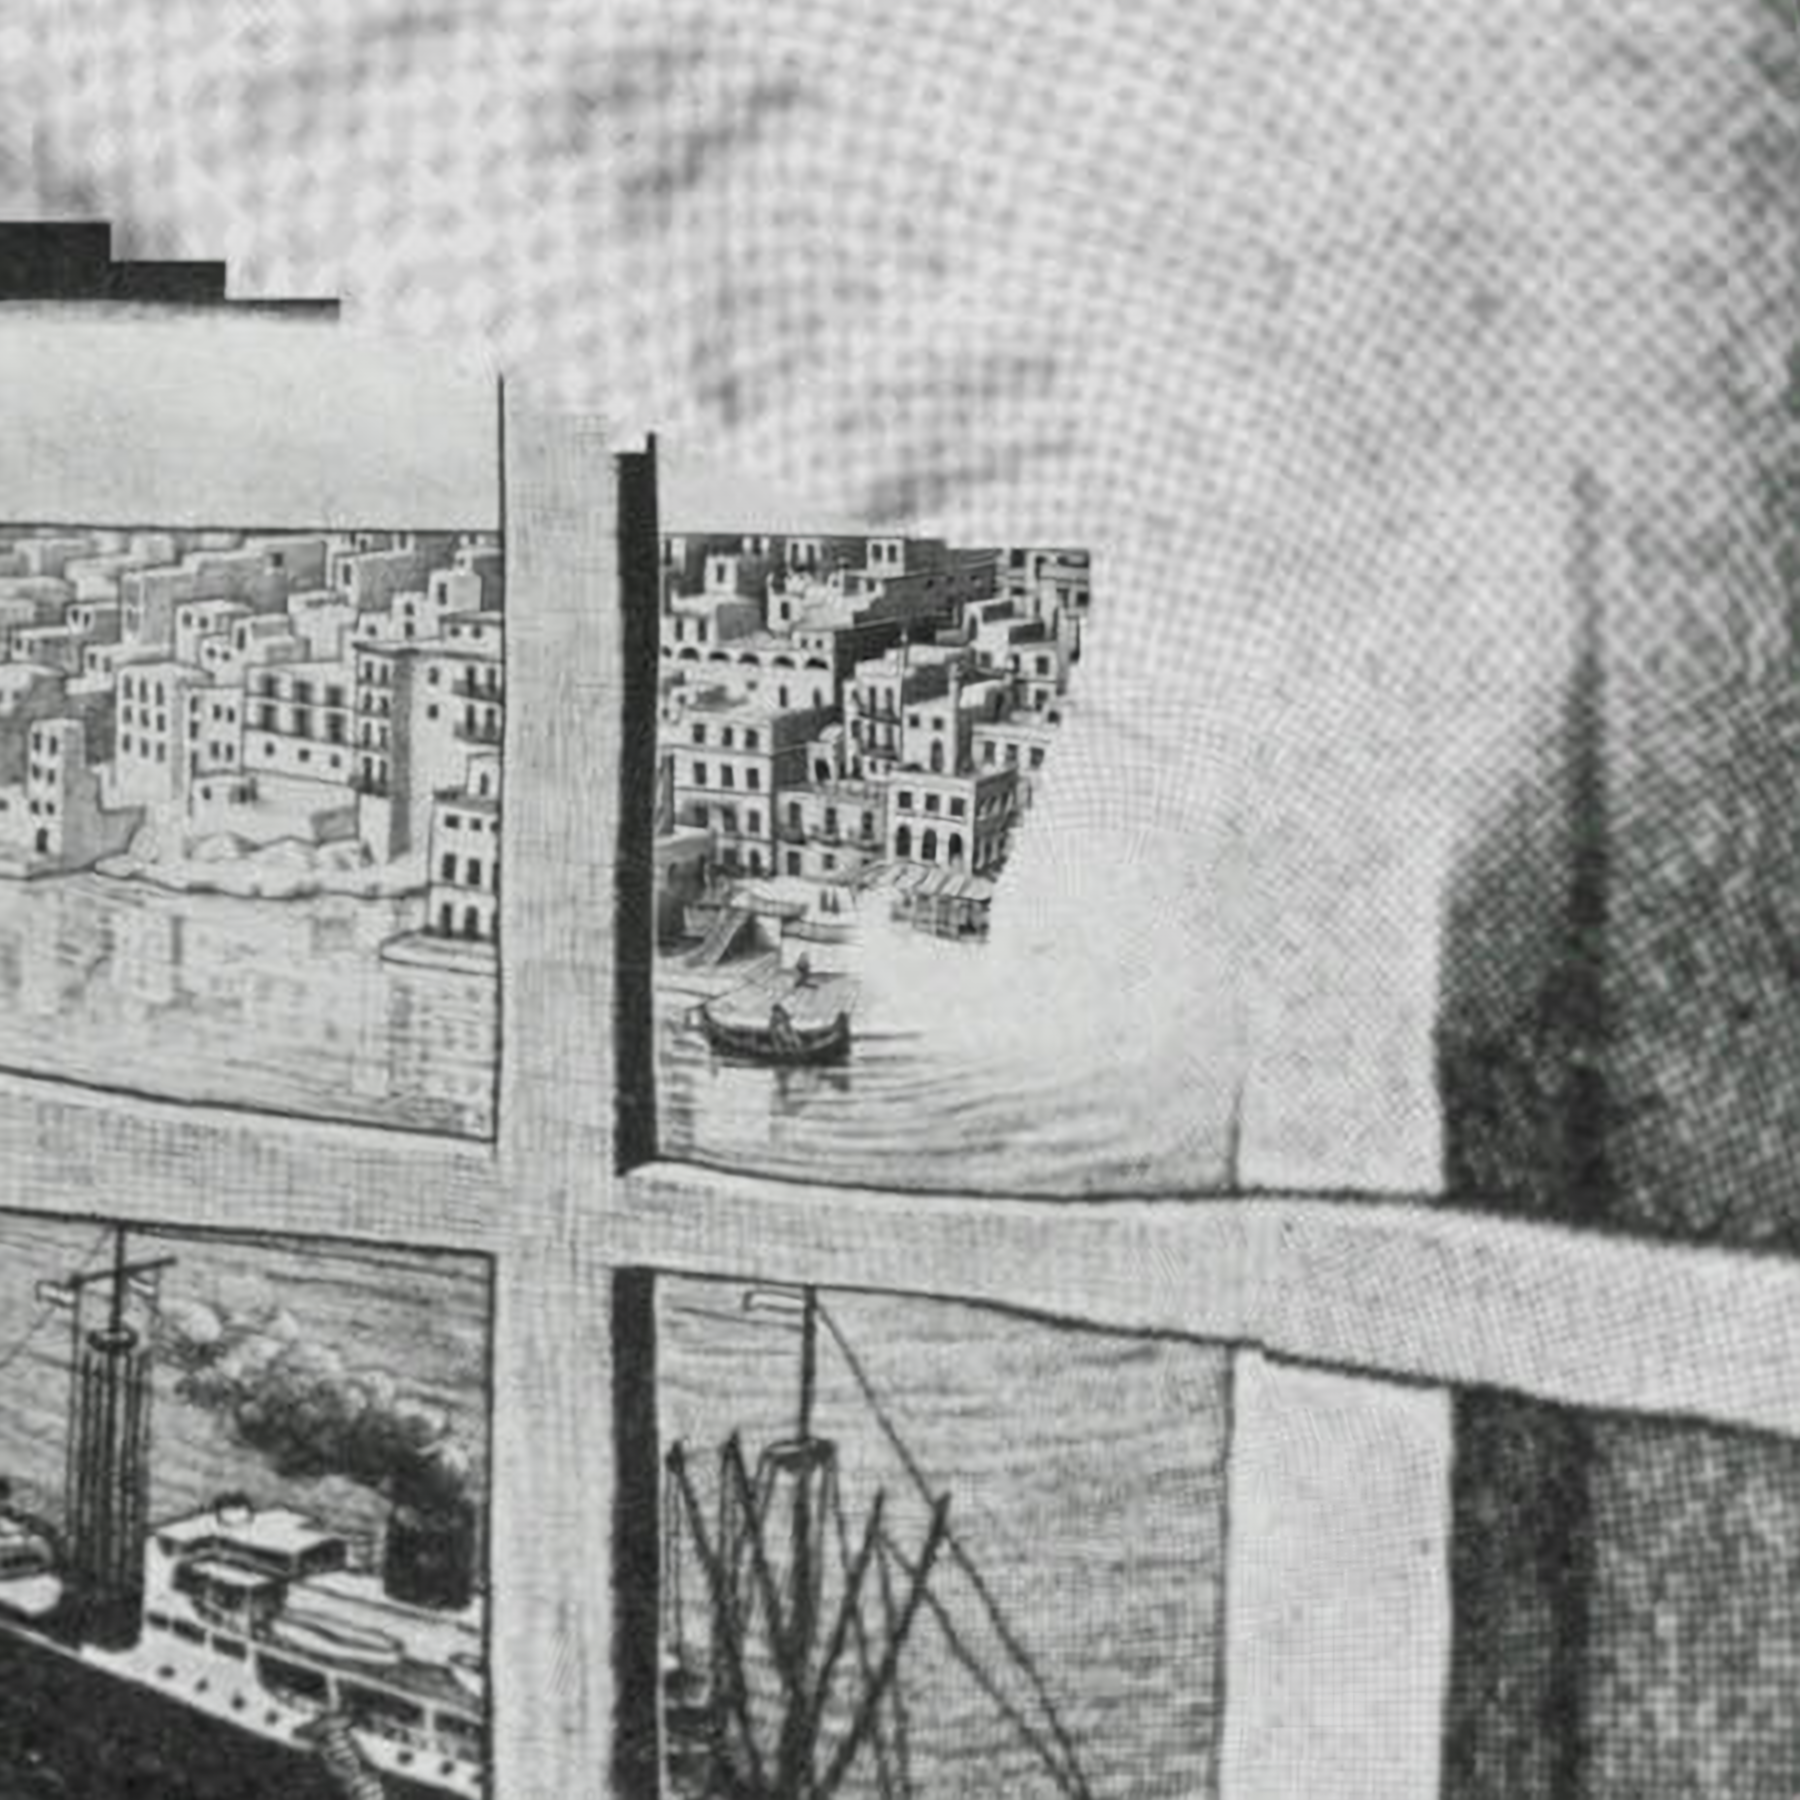

In [8]:
cv2_imshow(cv2.imread('/content/original.jpg')) #original
cv2_imshow(cv2.imread('/content/upscaled.png')) #upscaled